<a href="https://colab.research.google.com/github/ovieimara/ITNPBD4/blob/master/TimeGPT_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#| hide
!pip install -Uqq nixtla

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.5 MB/s eta 0:00:00


In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
#| hide
from nixtla.utils import in_colab

In [5]:
from nixtla import NixtlaClient

#You need to insert your Nixtla API key here between the quotes
#It starts with "`nixak-`"

In [6]:
nixtla_client = NixtlaClient(
    api_key = 'nixak-wFZ6sRKDf5eMQllDUKeth8N7m1J9IC2zJkAPaXbHvPmdz6oXDIQ19e6FXQZ3p2HK2H5f79vp1L4c19fH'
)

In [7]:
nixtla_client.validate_api_key()

True

In [8]:
import pandas as pd

## We're downloading the passengers files from Nixtla's instead of uploading it

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  144 non-null    object
 1   value      144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


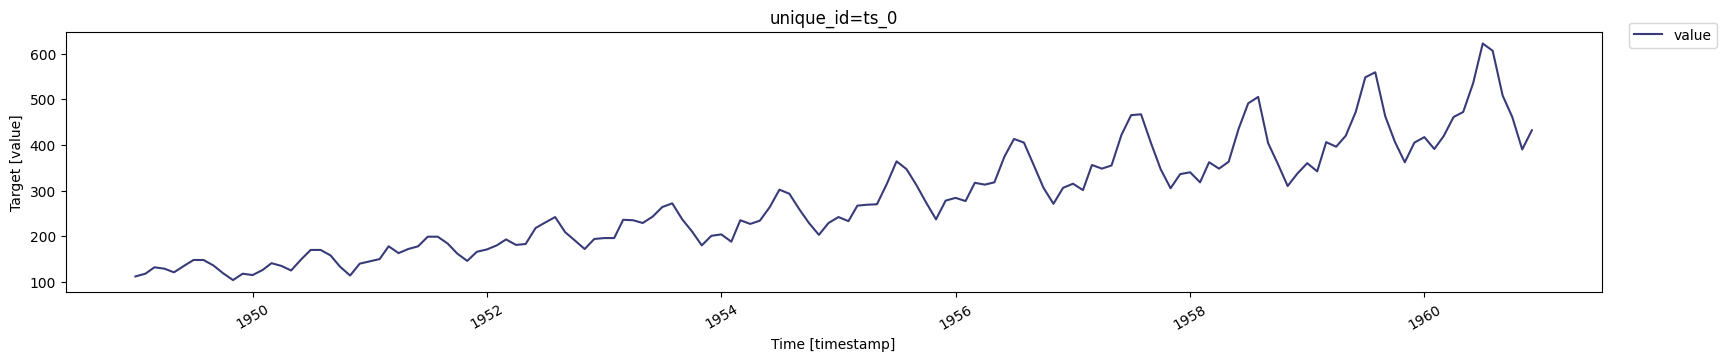

In [10]:
nixtla_client.plot(df, time_col='timestamp', target_col='value')

# This is the main 'forecast' function
##h is the 'horizon' in months at which you are forecasting
##check Nixtla's web site for details and instructions

In [27]:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=24, freq='MS', time_col='timestamp', target_col='value')
timegpt_fcst_df.head()

,timestamp,TimeGPT
0,1961-01-01,437.83792
1,1961-02-01,426.06270
2,1961-03-01,463.11655
3,1961-04-01,478.24450
4,1961-05-01,505.64648


#Plotting the Forecast

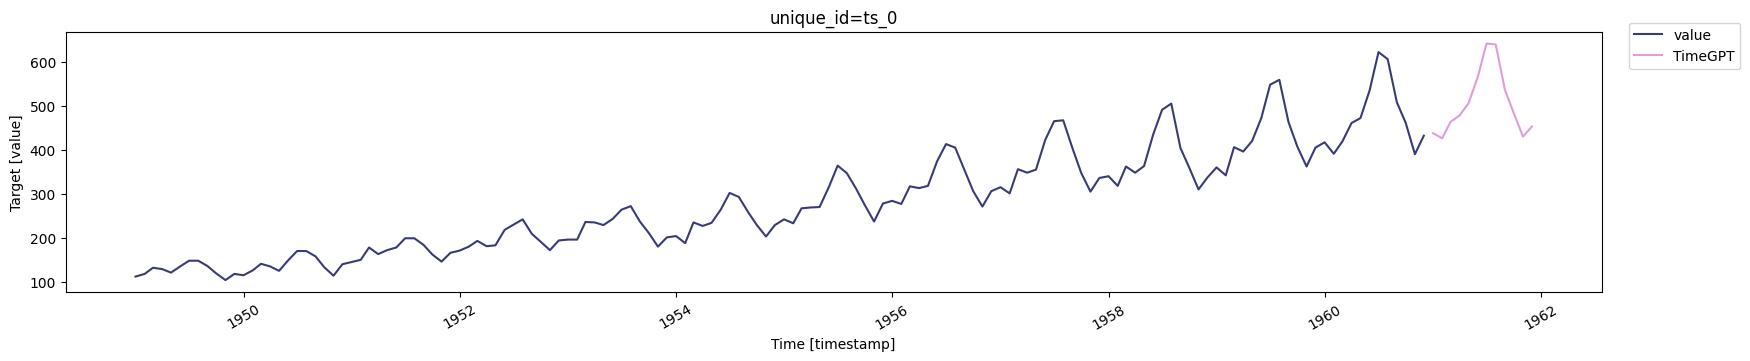

In [19]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')

#Try another horizon (36 months)

In [20]:
timegpt_fcst_df = nixtla_client.forecast(df=df, h=36, time_col='timestamp', target_col='value', freq='MS', model='timegpt-1-long-horizon')
timegpt_fcst_df.head()

,timestamp,TimeGPT
0,1961-01-01,436.84340
1,1961-02-01,419.35153
2,1961-03-01,458.94315
3,1961-04-01,477.87607
4,1961-05-01,505.65692


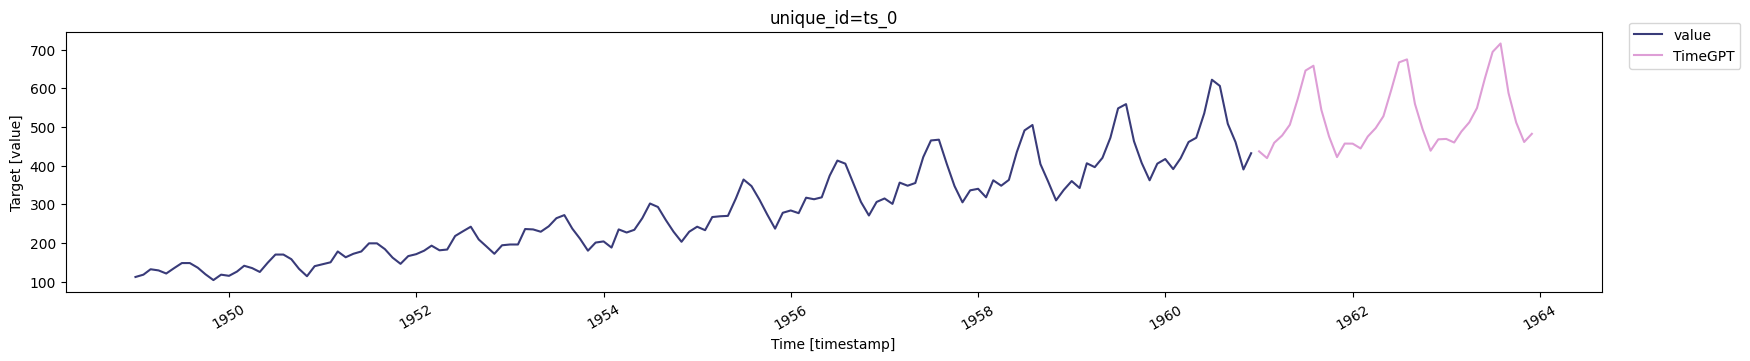

In [21]:
nixtla_client.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')